In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))


In [3]:
from features.Data_Transformation import LowPassFilter, PrincipalComponentAnalysis
from features.Temporal_Abstraction import NumericalAbstraction

In [4]:
df = pd.read_pickle("../data/interim/02_outliers_removed_chauvenets.pkl")

In [5]:
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [6]:
predictor_columns = list(df.columns[:6])
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [7]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyro_x       8984 non-null   float64
 4   gyro_y       8938 non-null   float64
 5   gyro_z       8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [9]:
# Imputing missing values using the interpolation function in pandas.

for col in predictor_columns:
    df[col] = df[col].interpolate()
    
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyro_x       9009 non-null   float64
 4   gyro_y       9009 non-null   float64
 5   gyro_z       9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


<Axes: xlabel='epoch (ms)'>

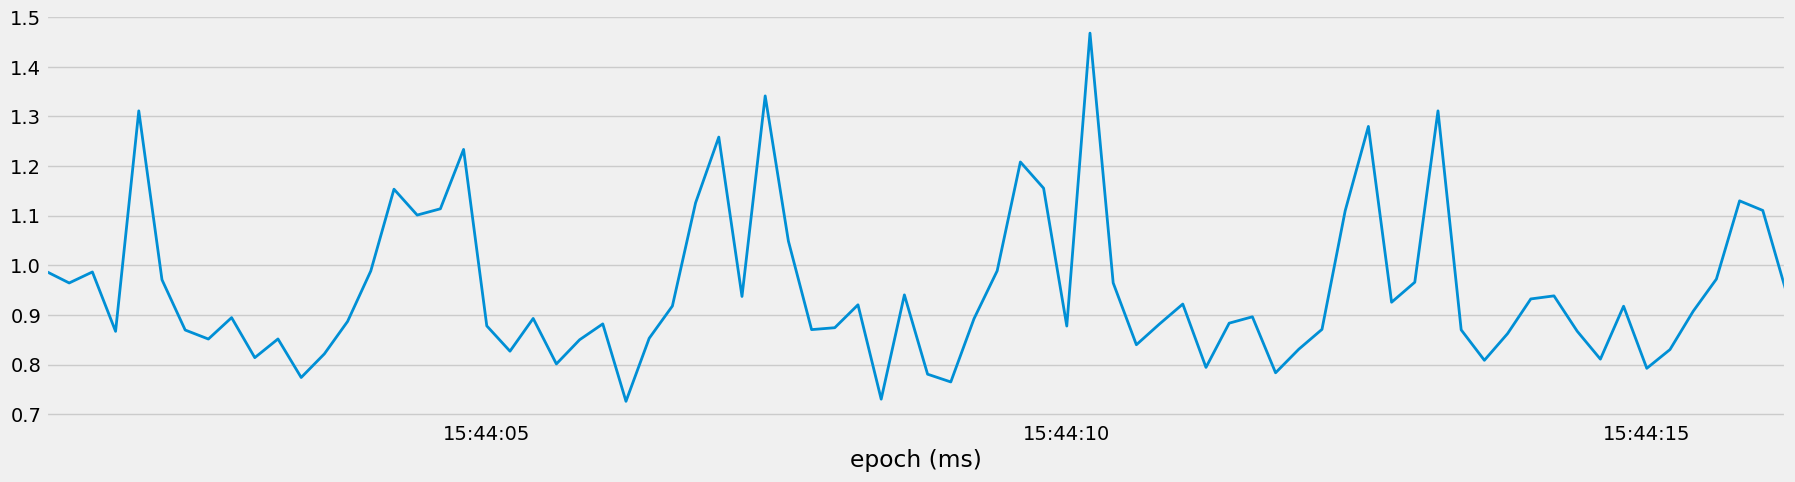

In [10]:
df[df["set"] == 11]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

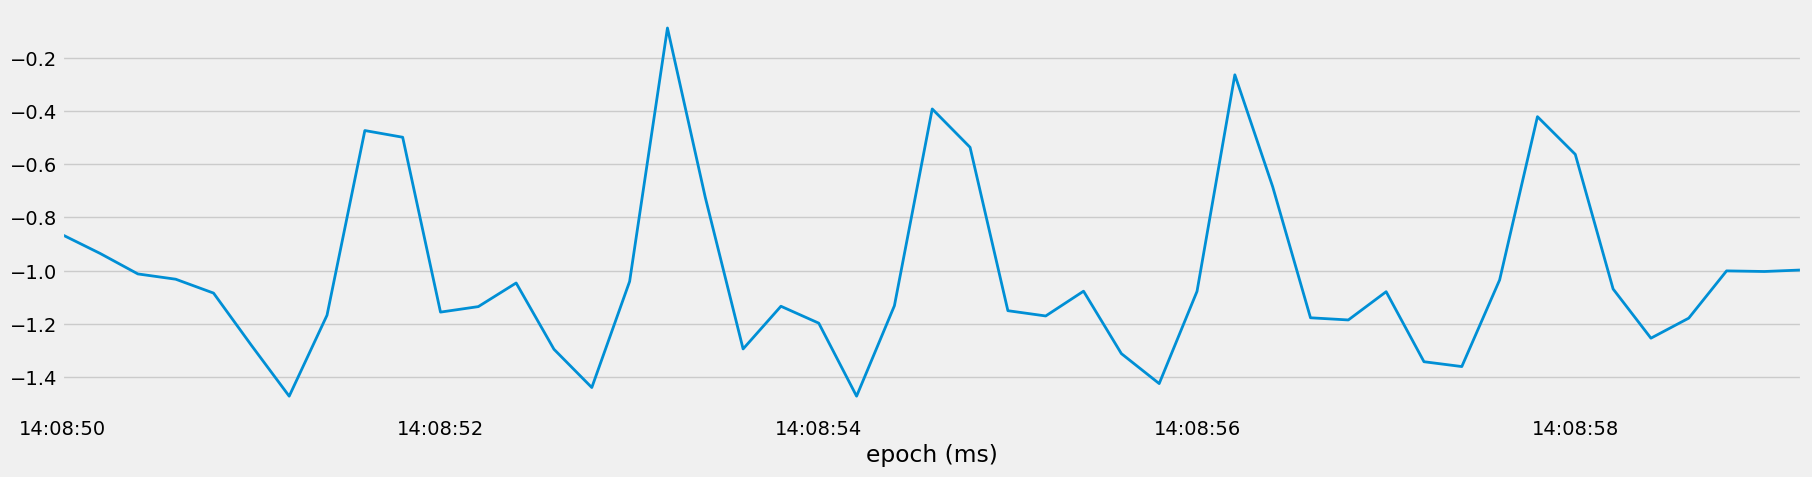

In [11]:
df[df["set"] == 50]["acc_y"].plot()

In [12]:
df[df["set"] == 50]

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-15 14:08:50.000,-0.012000,-0.865000,0.187000,-46.5245,-3.018000,-11.9510,C,row,heavy,50
2019-01-15 14:08:50.200,0.011000,-0.935333,0.077000,-45.2926,-4.475800,-9.7316,C,row,heavy,50
2019-01-15 14:08:50.400,0.021000,-1.012500,-0.013000,-22.6832,-10.183000,-6.5486,C,row,heavy,50
2019-01-15 14:08:50.600,0.032000,-1.032333,-0.072667,-1.5732,-6.292800,0.2804,C,row,heavy,50
2019-01-15 14:08:50.800,0.022500,-1.084500,-0.116000,5.0608,-0.500200,4.2804,C,row,heavy,50
2019-01-15 14:08:51.000,0.030000,-1.280667,-0.148000,6.5490,-4.317200,1.1342,C,row,heavy,50
2019-01-15 14:08:51.200,0.053000,-1.472000,-0.178000,32.4148,-29.878000,-23.4634,C,row,heavy,50
2019-01-15 14:08:51.400,0.176667,-1.167667,0.076667,37.6342,-29.878200,-30.9636,C,row,heavy,50
2019-01-15 14:08:51.600,0.117500,-0.473500,0.105000,33.6828,-11.439000,6.9024,C,row,heavy,50


In [13]:
# Finding the duration of single set

duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]
duration.seconds

16

In [14]:
# Finding the duration of all the sets

for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]
    
    duration = stop - start
    df.loc[(df["set"] == s), "duration"] = duration.seconds
    
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [15]:
duration_df = df.groupby(["category"])["duration"].mean()

In [16]:
duration_df.iloc[0] / 5  # Calculating the average time of per repetitions for heavy sets


np.float64(2.9487001733102254)

In [17]:
duration_df.iloc[1] / 10  # Calculating the average time of per repetitions for medium sets

np.float64(2.4942528735632186)

### Butterworth LowPassFilter

In [18]:
# Butterworth Low-Pass Filter

df_low_pass_filter = df.copy()
LowPass = LowPassFilter()

In [19]:
# Frequency Sampling (200ms for 1 repetition)
fs = 1000/200
cutoff = 1.3

In [20]:
df_low_pass_filter = LowPass.low_pass_filter(df_low_pass_filter, "acc_y", fs, cutoff, order=5)
df_low_pass_filter

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0,0.977003
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0,0.973169
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0,0.966879
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0,0.962244
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0,0.959572
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0,-0.988153
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0,-1.053448
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0,-1.044737


In [21]:
subset = df_low_pass_filter[df_low_pass_filter["set"] == 45]
print(subset["label"][0])

ohp


C:\Users\91780\AppData\Local\Temp\ipykernel_11552\2196987246.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset["label"][0])


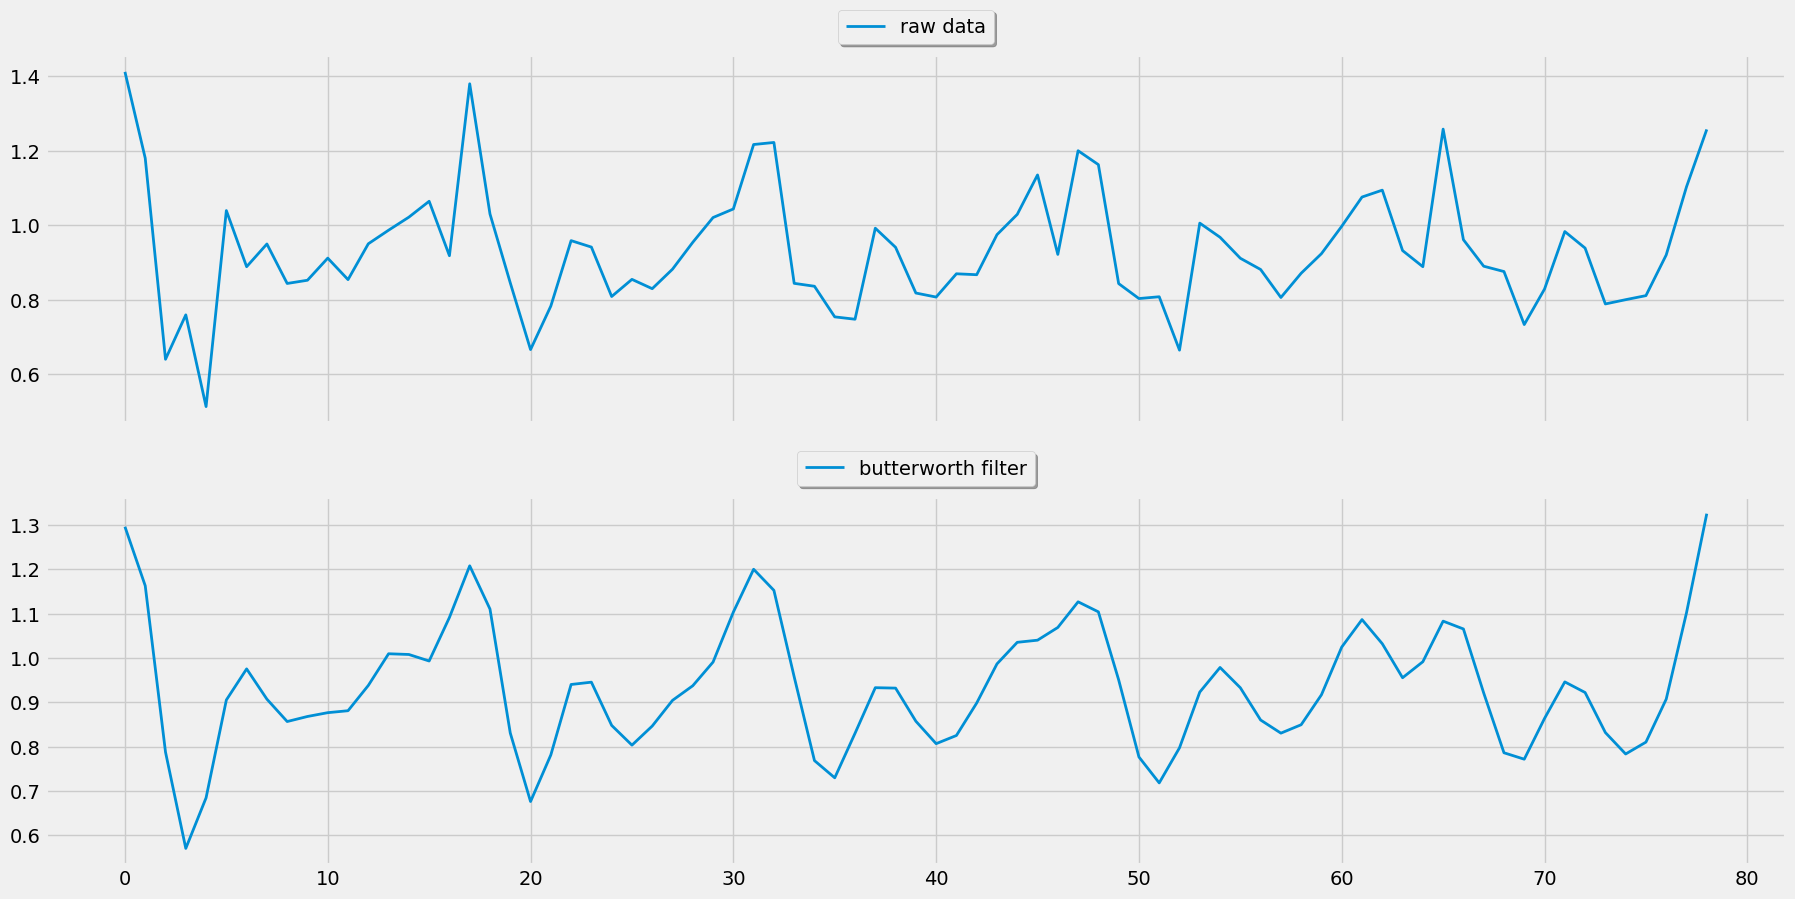

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True),label = "raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True),label = "butterworth filter")

ax[0].legend(loc = "upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

ax[1].legend(loc = "upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

In [23]:
# Looping all over the columns

for col in predictor_columns:
    df_low_pass_filter = LowPass.low_pass_filter(df_low_pass_filter, col, fs, cutoff, order=5)
    df_low_pass_filter[col] = df_low_pass_filter[col + "_lowpass"]
    del df_low_pass_filter[col + "_lowpass"]
    
df_low_pass_filter

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0


### Principal Component Analysis (PCA)

In [24]:
df_PCA = df_low_pass_filter.copy()
PCA = PrincipalComponentAnalysis()

In [25]:
pc_values = PCA.determine_pc_explained_variance(df_PCA, predictor_columns)
pc_values

array([0.57992901, 0.27309479, 0.06509761, 0.05306529, 0.01866432,
       0.01014897])

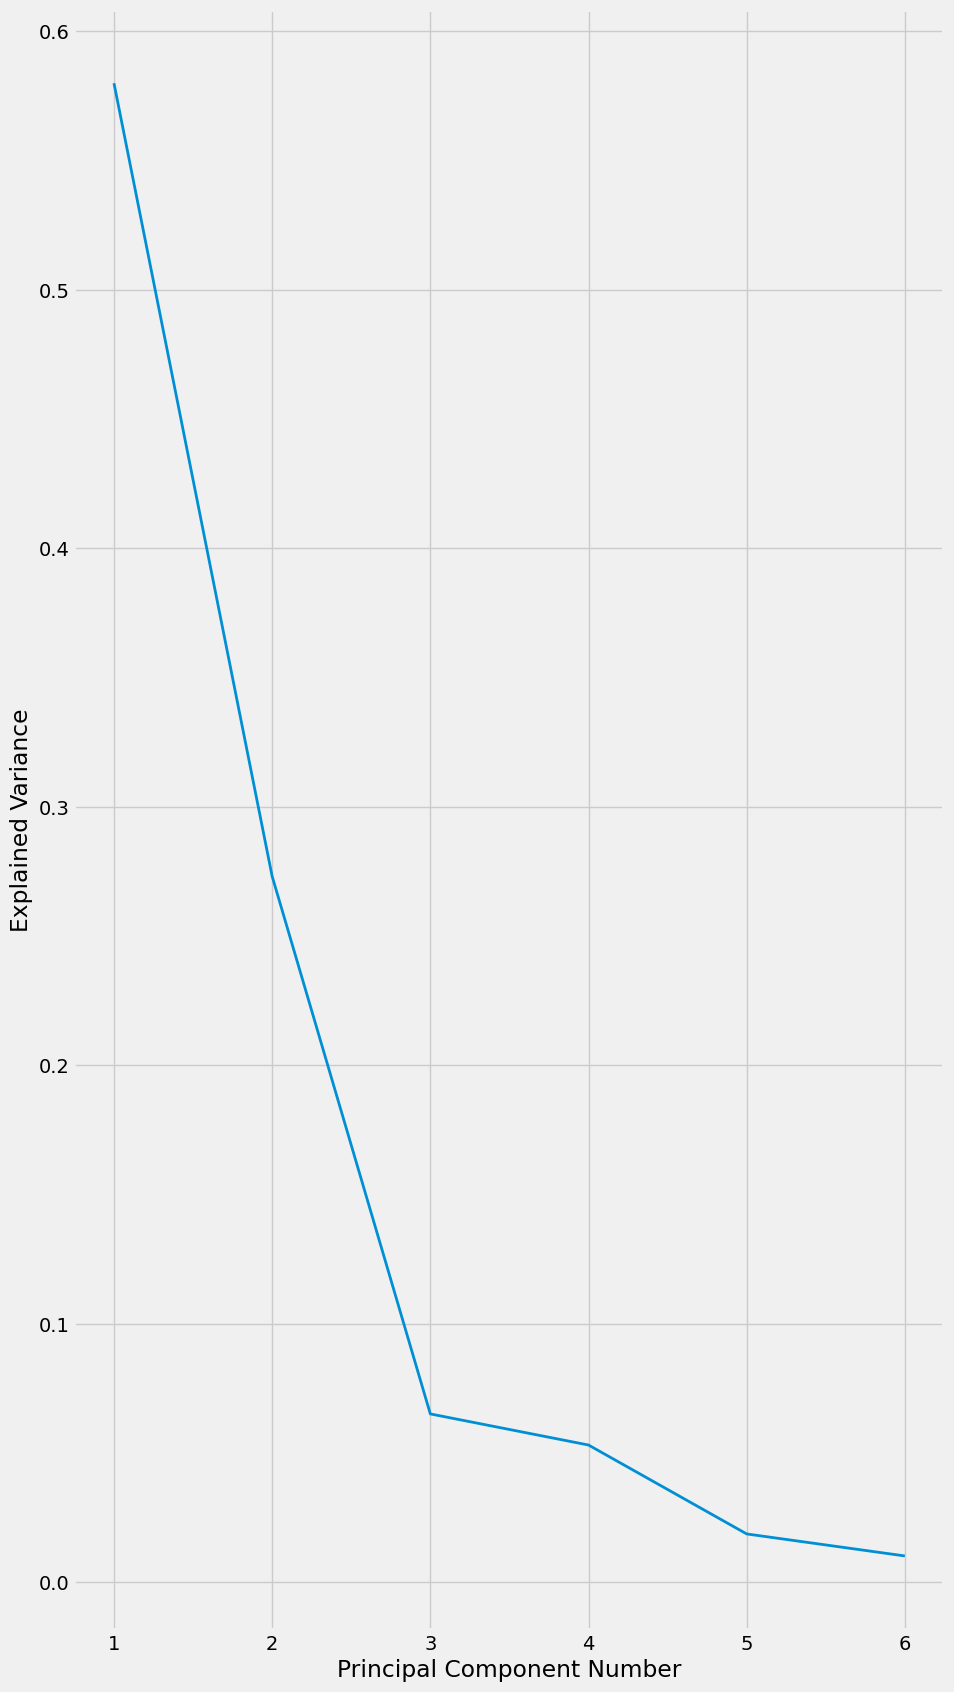

In [26]:
plt.figure(figsize=(10, 20))
plt.plot(range(1, len(predictor_columns) + 1), pc_values)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance")
plt.show()

In [27]:
df_PCA = PCA.apply_pca(df_PCA, predictor_columns, 3)
df_PCA

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,-0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,-0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,-0.368098,-0.153153,-0.058772


In [28]:
subset = df_PCA[df_PCA["set"] == 35]
subset

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:48:54.800,-0.094396,0.891041,-0.005994,-2.338054,-3.884629,1.745296,B,ohp,medium,35,21.0,0.294343,-0.059385,0.003727
2019-01-11 15:48:55.000,-0.093845,0.953323,0.080001,-3.814675,-2.375120,4.447539,B,ohp,medium,35,21.0,0.313398,-0.006771,-0.013395
2019-01-11 15:48:55.200,-0.133457,1.182284,0.049543,0.341722,-5.827977,-14.474650,B,ohp,medium,35,21.0,0.395533,-0.023779,-0.008200
2019-01-11 15:48:55.400,-0.214620,1.266713,-0.097444,1.836545,-15.200894,-38.378502,B,ohp,medium,35,21.0,0.435004,-0.121345,-0.004419
2019-01-11 15:48:55.600,-0.297162,1.034657,-0.229331,-8.084908,-15.295883,-34.485185,B,ohp,medium,35,21.0,0.366605,-0.220814,-0.031165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:15.600,-0.351624,0.948756,-0.227174,-20.037197,-17.034945,1.458312,B,ohp,medium,35,21.0,0.342327,-0.231862,-0.072531
2019-01-11 15:49:15.800,-0.424993,1.266271,-0.151429,-47.826553,-23.376297,24.493841,B,ohp,medium,35,21.0,0.455707,-0.189263,-0.127620
2019-01-11 15:49:16.000,-0.335881,1.171543,-0.035990,-28.663875,-19.242887,14.107873,B,ohp,medium,35,21.0,0.412323,-0.109535,-0.104000


<Axes: xlabel='epoch (ms)'>

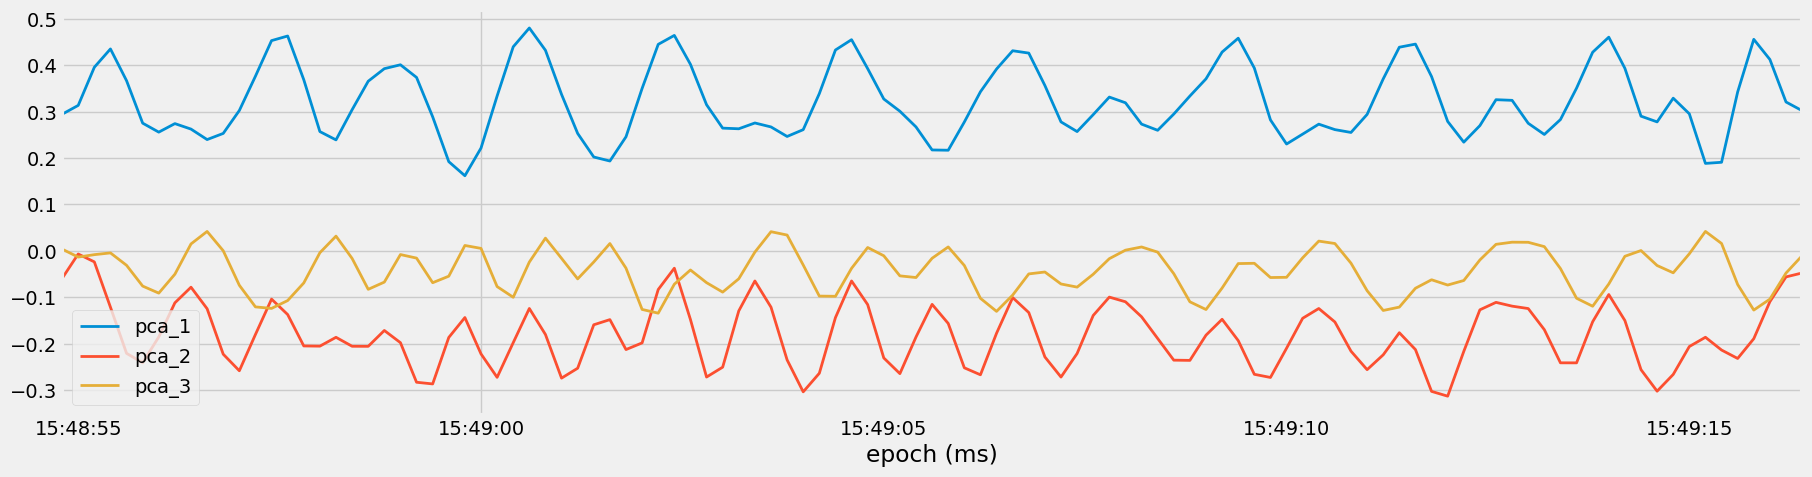

In [29]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

### Sum of squares attribute

In [30]:
df_squared = df_PCA.copy()

acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2
gyro_r = df_squared["gyro_x"] ** 2 + df_squared["gyro_y"] ** 2 + df_squared["gyro_z"] ** 2

In [31]:
acc_r

epoch (ms)
2019-01-11 15:08:05.200    0.959758
2019-01-11 15:08:05.400    0.951550
2019-01-11 15:08:05.600    0.940095
2019-01-11 15:08:05.800    0.933694
2019-01-11 15:08:06.000    0.930633
                             ...   
2019-01-20 17:33:27.000    0.982231
2019-01-20 17:33:27.200    1.115630
2019-01-20 17:33:27.400    1.098133
2019-01-20 17:33:27.600    1.027507
2019-01-20 17:33:27.800    1.076688
Length: 9009, dtype: float64

In [32]:
gyro_r

epoch (ms)
2019-01-11 15:08:05.200    10.384526
2019-01-11 15:08:05.400     0.360211
2019-01-11 15:08:05.600    24.492348
2019-01-11 15:08:05.800    34.847803
2019-01-11 15:08:06.000     5.260569
                             ...    
2019-01-20 17:33:27.000    20.328548
2019-01-20 17:33:27.200    18.397341
2019-01-20 17:33:27.400     5.426886
2019-01-20 17:33:27.600    15.173048
2019-01-20 17:33:27.800    18.335044
Length: 9009, dtype: float64

In [33]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyro_r"] = np.sqrt(gyro_r)

In [34]:
subset = df_squared[df_squared["set"] == 14]
subset

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyro_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-14 13:55:42.600,-0.108844,1.363893,-0.232202,9.383811,1.897146,-25.433289,A,ohp,heavy,14,14.0,0.462139,-0.177939,0.082722,1.387792,27.175490
2019-01-14 13:55:42.800,-0.237128,1.135894,-0.287747,18.257195,5.938479,-45.219659,A,ohp,heavy,14,14.0,0.396694,-0.240701,0.033224,1.195526,49.126452
2019-01-14 13:55:43.000,-0.327636,0.863365,-0.246855,4.211681,2.673518,-26.124145,A,ohp,heavy,14,14.0,0.310975,-0.241889,-0.042364,0.955867,26.596182
2019-01-14 13:55:43.200,-0.349145,0.776706,-0.208875,-20.546628,1.904198,5.720663,A,ohp,heavy,14,14.0,0.282959,-0.226135,-0.084842,0.876814,21.412984
2019-01-14 13:55:43.400,-0.312218,0.826404,-0.185784,-26.013082,2.040092,26.809748,A,ohp,heavy,14,14.0,0.296276,-0.204360,-0.076541,0.902740,37.411295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:56.600,-0.197104,1.129268,-0.148716,-18.452865,-14.406862,38.427667,A,ohp,heavy,14,14.0,0.388505,-0.152617,-0.013487,1.155946,44.997239
2019-01-14 13:55:56.800,-0.110220,1.158114,-0.096057,4.436677,-5.767057,5.849225,A,ohp,heavy,14,14.0,0.388880,-0.105712,0.034376,1.167306,9.335764
2019-01-14 13:55:57.000,-0.114312,1.011026,-0.089745,2.393365,1.783427,-16.470421,A,ohp,heavy,14,14.0,0.338920,-0.107651,0.024705,1.021418,16.738685


In [35]:
subset[["acc_r", "gyro_r"]]

,acc_r,gyro_r
epoch (ms),,
2019-01-14 13:55:42.600,1.387792,27.175490
2019-01-14 13:55:42.800,1.195526,49.126452
2019-01-14 13:55:43.000,0.955867,26.596182
2019-01-14 13:55:43.200,0.876814,21.412984
2019-01-14 13:55:43.400,0.902740,37.411295
...,...,...
2019-01-14 13:55:56.600,1.155946,44.997239
2019-01-14 13:55:56.800,1.167306,9.335764
2019-01-14 13:55:57.000,1.021418,16.738685


array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

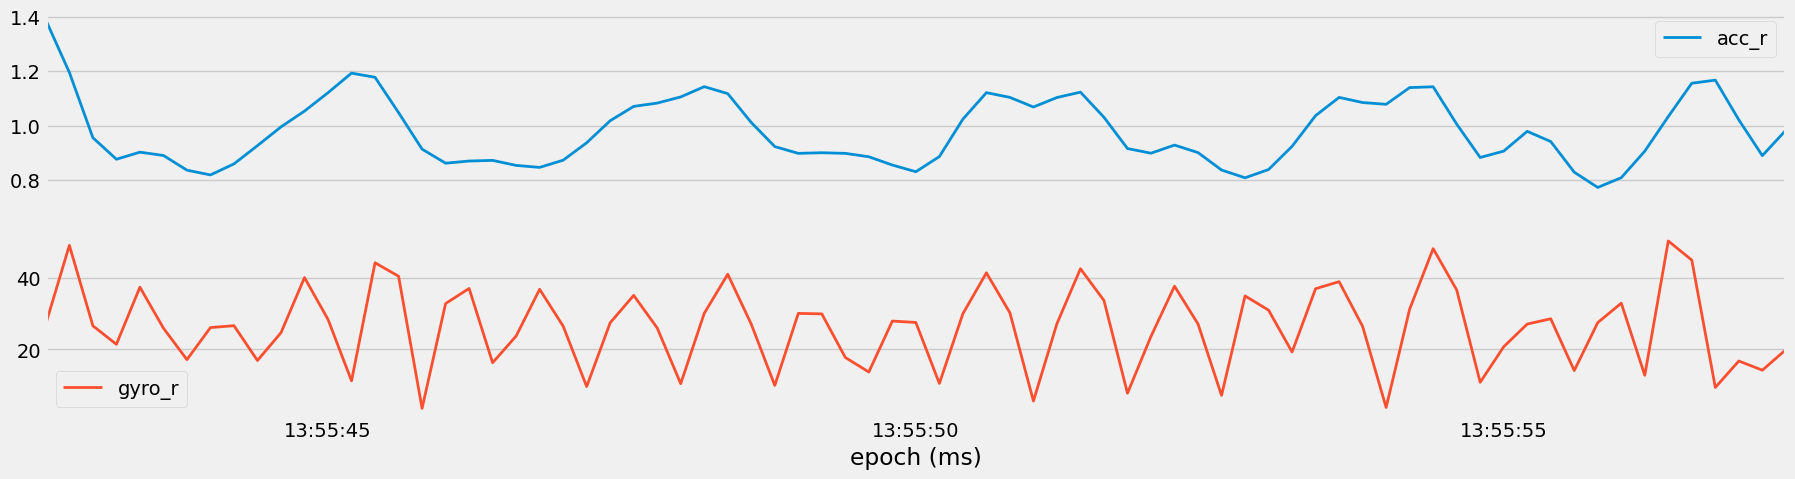

In [36]:
subset[["acc_r", "gyro_r"]].plot(subplots = True)

In [37]:
df_squared

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyro_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,-0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,-0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,-0.368098,-0.153153,-0.058772,1.047919,2.329568


### Temporal Abstraction

In [38]:
df_temporal = df_squared.copy()
df_temporal

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyro_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,-0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,-0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,-0.368098,-0.153153,-0.058772,1.047919,2.329568


In [39]:
NumAbs = NumericalAbstraction()

In [40]:
predictor_columns = predictor_columns + ["acc_r", "gyro_r"]
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'acc_r', 'gyro_r']

In [41]:
# Window Size
ws = int(1000/200)

In [42]:
# In this case the Numerical Abstraction will do the calculation of mean and std for window size 5
# By doing this we are allowing it to use the data of the different labels (for ex Bench and Ohp data might get mixed)and the calculating the
# mean and std and this step should not be done.

for col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")

In [43]:
df_temporal

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328


In [44]:
# The earlier step was putting the data of others labels (for example, ohp into row/bench)
# This step will create subsets of the set labels for individual sets 
# (for ex -  a subset will have only ohp data or row data or bench data) and then perform numerical abstraction


df_temporal_list = []
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)
    
df_temporal = pd.concat(df_temporal_list)

In [45]:
df_temporal

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328


In [46]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acc_x                  9009 non-null   float64
 1   acc_y                  9009 non-null   float64
 2   acc_z                  9009 non-null   float64
 3   gyro_x                 9009 non-null   float64
 4   gyro_y                 9009 non-null   float64
 5   gyro_z                 9009 non-null   float64
 6   participant            9009 non-null   object 
 7   label                  9009 non-null   object 
 8   category               9009 non-null   object 
 9   set                    9009 non-null   int64  
 10  duration               9009 non-null   float64
 11  pca_1                  9009 non-null   float64
 12  pca_2                  9009 non-null   float64
 13  pca_3                  9009 non-null   float64
 14  acc_r 

<Axes: xlabel='epoch (ms)'>

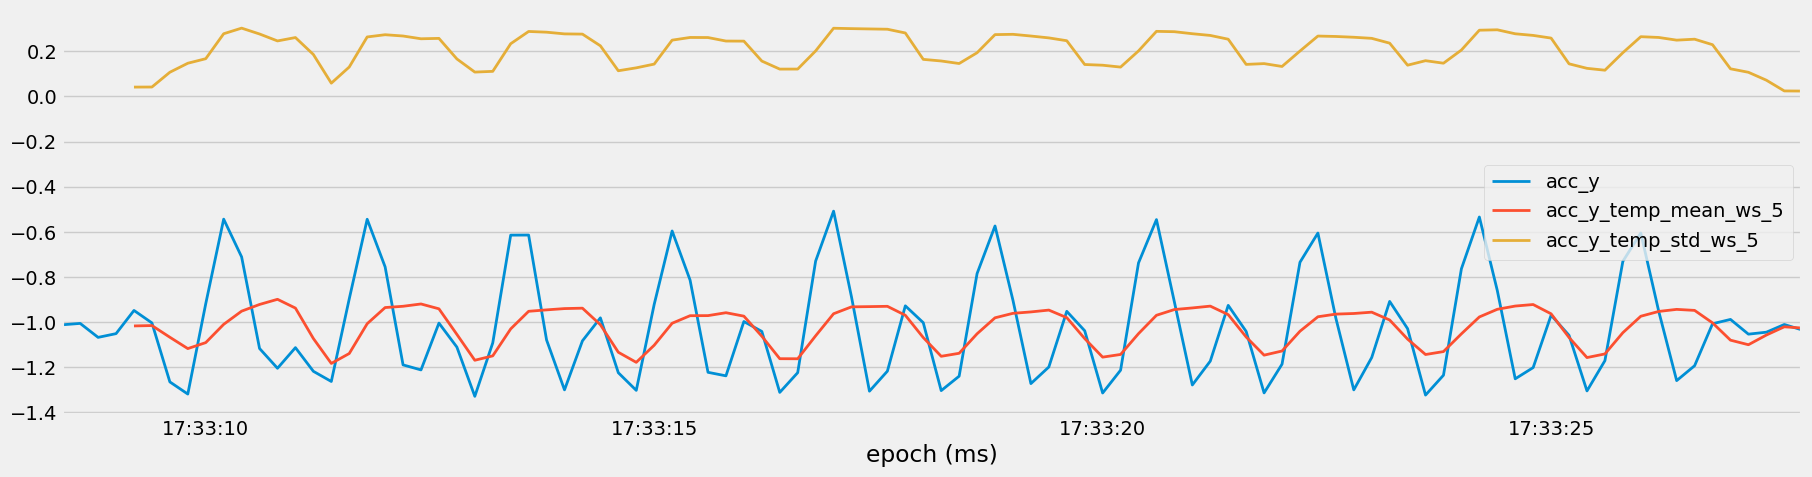

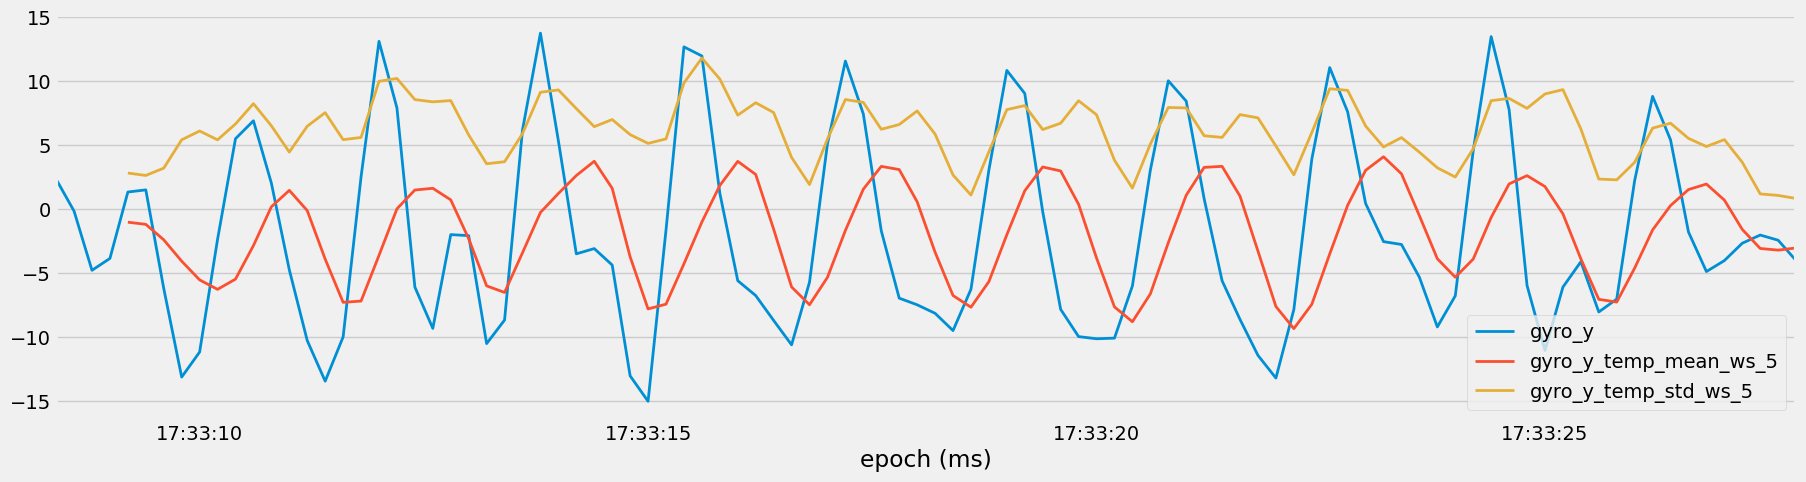

In [47]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()
subset[["gyro_y", "gyro_y_temp_mean_ws_5", "gyro_y_temp_std_ws_5"]].plot()

### Discrete Fourier Transform (DFT)

In [48]:
df_freq = df_temporal.copy().reset_index()
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,...,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,E,row,medium,...,2.006143,3.622861,-3.200450,1.071976,0.760034,0.532219,1.024177,0.024274,4.877383,2.369344


In [49]:
from features.FrequencyAbstraction import FourierTransformation

FreqAbs = FourierTransformation()

In [50]:
fs = int(1000/200) # Sampling frequency
ws = int(2800/200) # Window size (2800 miliseconds - average time for a repetition)

In [51]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

In [52]:
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,...,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,...,-0.366246,0.080086,-15.086721,0.169773,1.260702,0.908251,0.370038,0.284737,0.272604,0.270130
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,...,-0.189618,0.098206,-15.605886,-0.499724,1.034515,-1.036798,0.960714,0.363849,0.279607,0.252243
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,...,0.083718,0.054012,-15.790817,-0.732594,0.519170,-1.087010,-0.032387,-0.036956,-0.056240,-0.063536
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,E,row,medium,...,0.116557,0.041741,-15.550088,-0.433942,0.006282,0.624310,-0.794175,-0.262326,-0.198431,-0.178484


In [53]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   epoch (ms)                 9009 non-null   datetime64[ns]
 1   acc_x                      9009 non-null   float64       
 2   acc_y                      9009 non-null   float64       
 3   acc_z                      9009 non-null   float64       
 4   gyro_x                     9009 non-null   float64       
 5   gyro_y                     9009 non-null   float64       
 6   gyro_z                     9009 non-null   float64       
 7   participant                9009 non-null   object        
 8   label                      9009 non-null   object        
 9   category                   9009 non-null   object        
 10  set                        9009 non-null   int64         
 11  duration                   9009 non-null   float64       
 12  pca_1 

<Axes: >

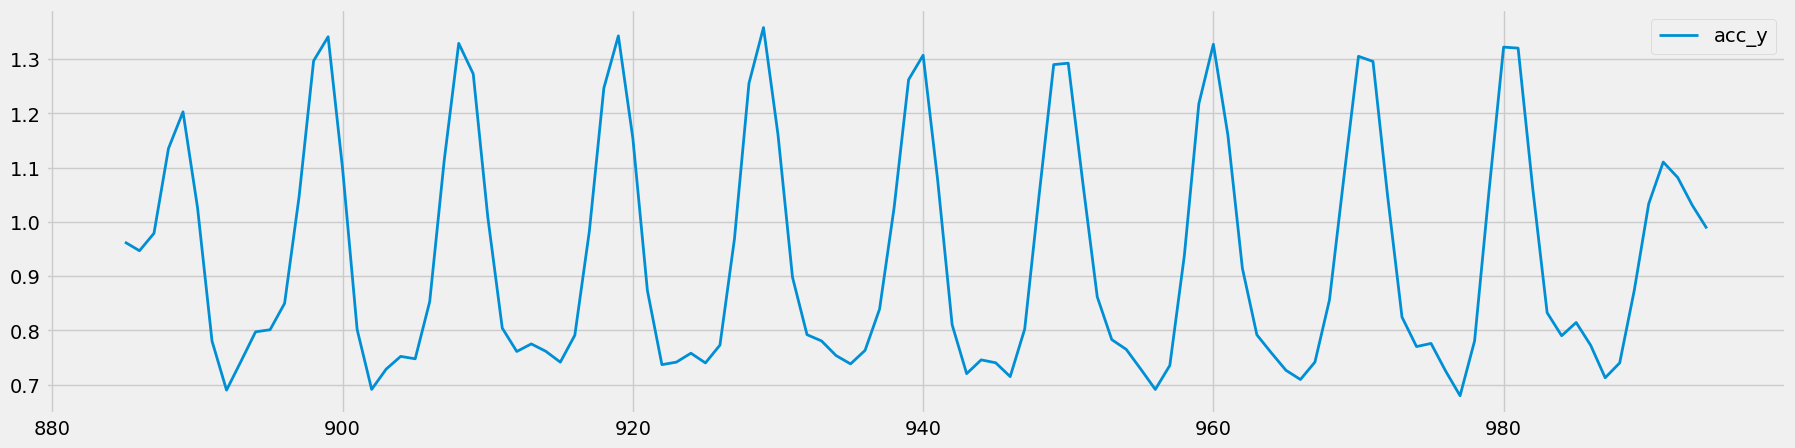

In [54]:
subset = df_freq[df_freq["set"] == 15]
subset[["acc_y"]].plot()

<Axes: >

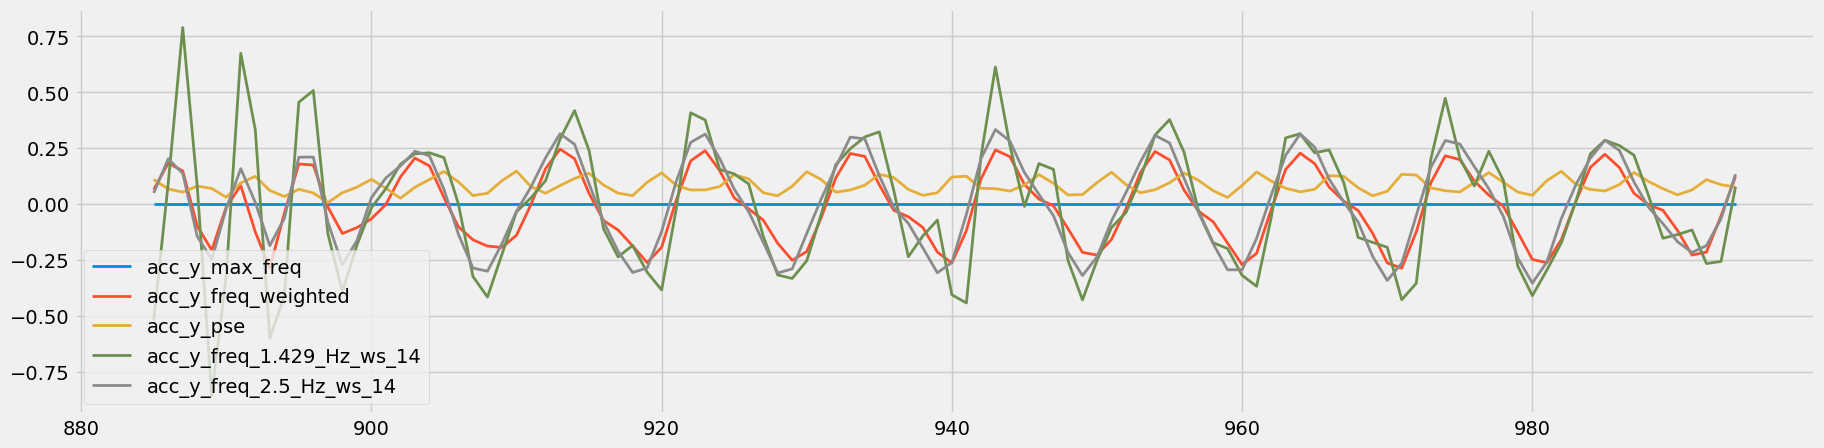

In [55]:
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14"
    ]
].plot()

In [56]:
df_freq_list = []
for s in df_freq["set"].unique():
    print(f"Applying Fourier transform to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop = True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, ws, fs)
    df_freq_list.append(subset)

Applying Fourier transform to set 30
Applying Fourier transform to set 1
Applying Fourier transform to set 31
Applying Fourier transform to set 3
Applying Fourier transform to set 9
Applying Fourier transform to set 32
Applying Fourier transform to set 10
Applying Fourier transform to set 33
Applying Fourier transform to set 11
Applying Fourier transform to set 34
Applying Fourier transform to set 35
Applying Fourier transform to set 15
Applying Fourier transform to set 36
Applying Fourier transform to set 16
Applying Fourier transform to set 37
Applying Fourier transform to set 17
Applying Fourier transform to set 27
Applying Fourier transform to set 38
Applying Fourier transform to set 28
Applying Fourier transform to set 29
Applying Fourier transform to set 6
Applying Fourier transform to set 65
Applying Fourier transform to set 67
Applying Fourier transform to set 73
Applying Fourier transform to set 4
Applying Fourier transform to set 2
Applying Fourier transform to set 39
Applyin

In [57]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)

In [58]:
df_freq

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [59]:
df_freq.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'participant',
       'label', 'category', 'set',
       ...
       'gyro_r_freq_weighted', 'gyro_r_pse', 'gyro_r_freq_0.0_Hz_ws_14',
       'gyro_r_freq_0.357_Hz_ws_14', 'gyro_r_freq_0.714_Hz_ws_14',
       'gyro_r_freq_1.071_Hz_ws_14', 'gyro_r_freq_1.429_Hz_ws_14',
       'gyro_r_freq_1.786_Hz_ws_14', 'gyro_r_freq_2.143_Hz_ws_14',
       'gyro_r_freq_2.5_Hz_ws_14'],
      dtype='object', length=120)

### Dealing with Overlapping Window

In [60]:
df_freq = df_freq.dropna()
df_freq

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,-0.075541,0.854894,-0.094507,-17.787623,-7.152388,16.679304,B,bench,heavy,30,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.600,-0.039468,0.947898,-0.047164,1.731909,-0.126808,-3.356740,B,bench,heavy,30,...,-0.051046,0.608396,265.472278,-54.366043,-70.788251,-14.043211,32.170170,36.805962,-27.594837,9.354092
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [61]:
# This will drop all the alternate columns from the dataset
df_freq = df_freq.iloc[::2]
df_freq

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


### Clustering

In [62]:
from sklearn.cluster import KMeans 

In [63]:
df_cluster = df_freq.copy()
df_cluster

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [65]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters =  k, n_init = 20, random_state =0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

In [66]:
inertias

[888.2145379895425,
 513.7868949414759,
 315.93888382136834,
 234.30076852770605,
 209.1873383650352,
 185.88222426924668,
 165.53928247652053,
 147.1797746589048]

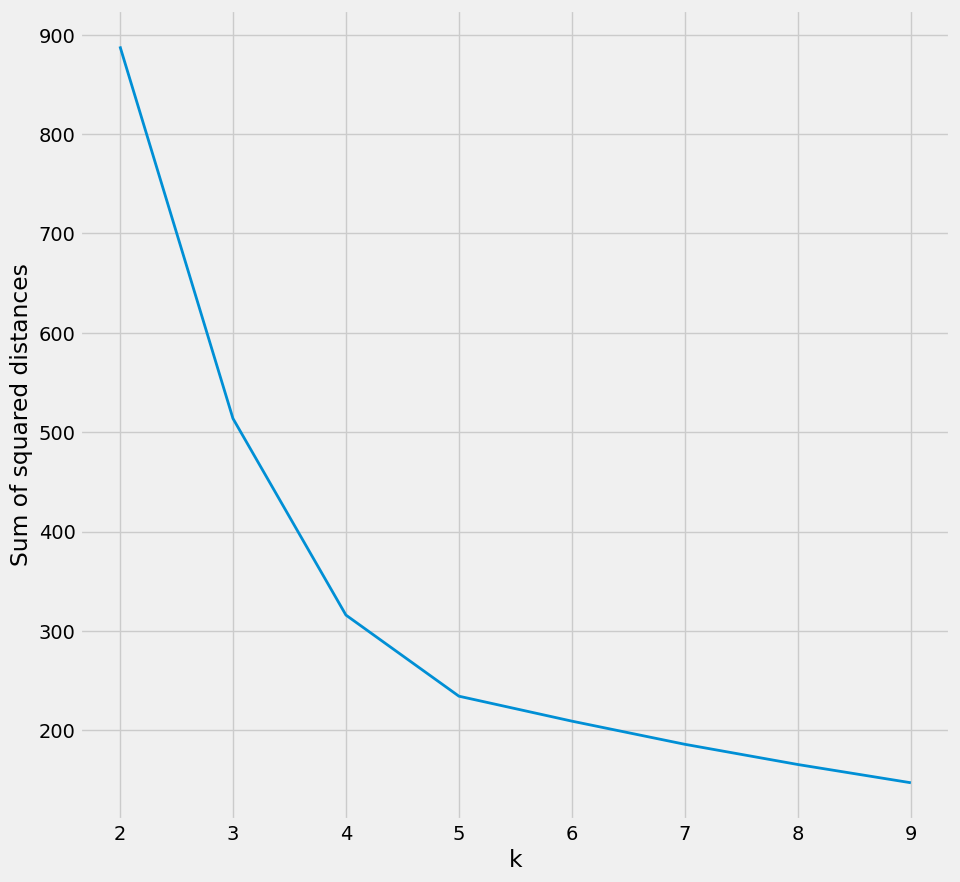

In [68]:
plt.figure(figsize=(10,10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

In [69]:
# After seeing the plot we can say that the optimal value for k is 5.

kmeans = KMeans(n_clusters = 5, n_init = 20, random_state =0)
subset = df_cluster[cluster_columns]
df_cluster["cluster"] = kmeans.fit_predict(subset)

df_cluster

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


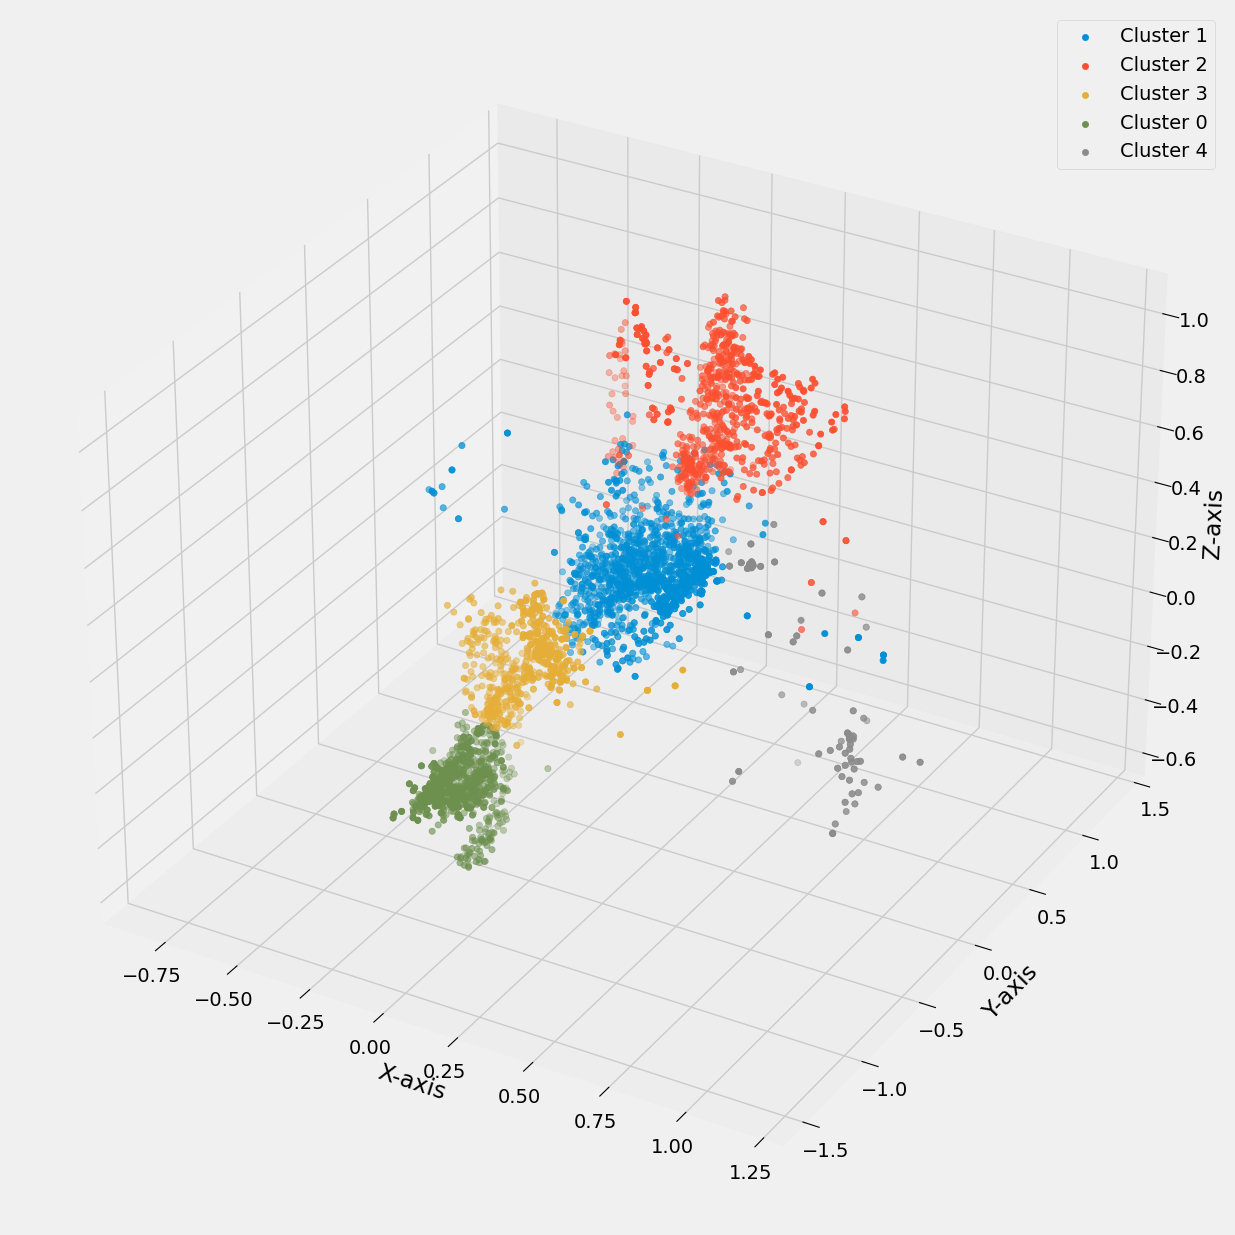

In [71]:
# Plotting clusters

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection = "3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label = f"Cluster {c}")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

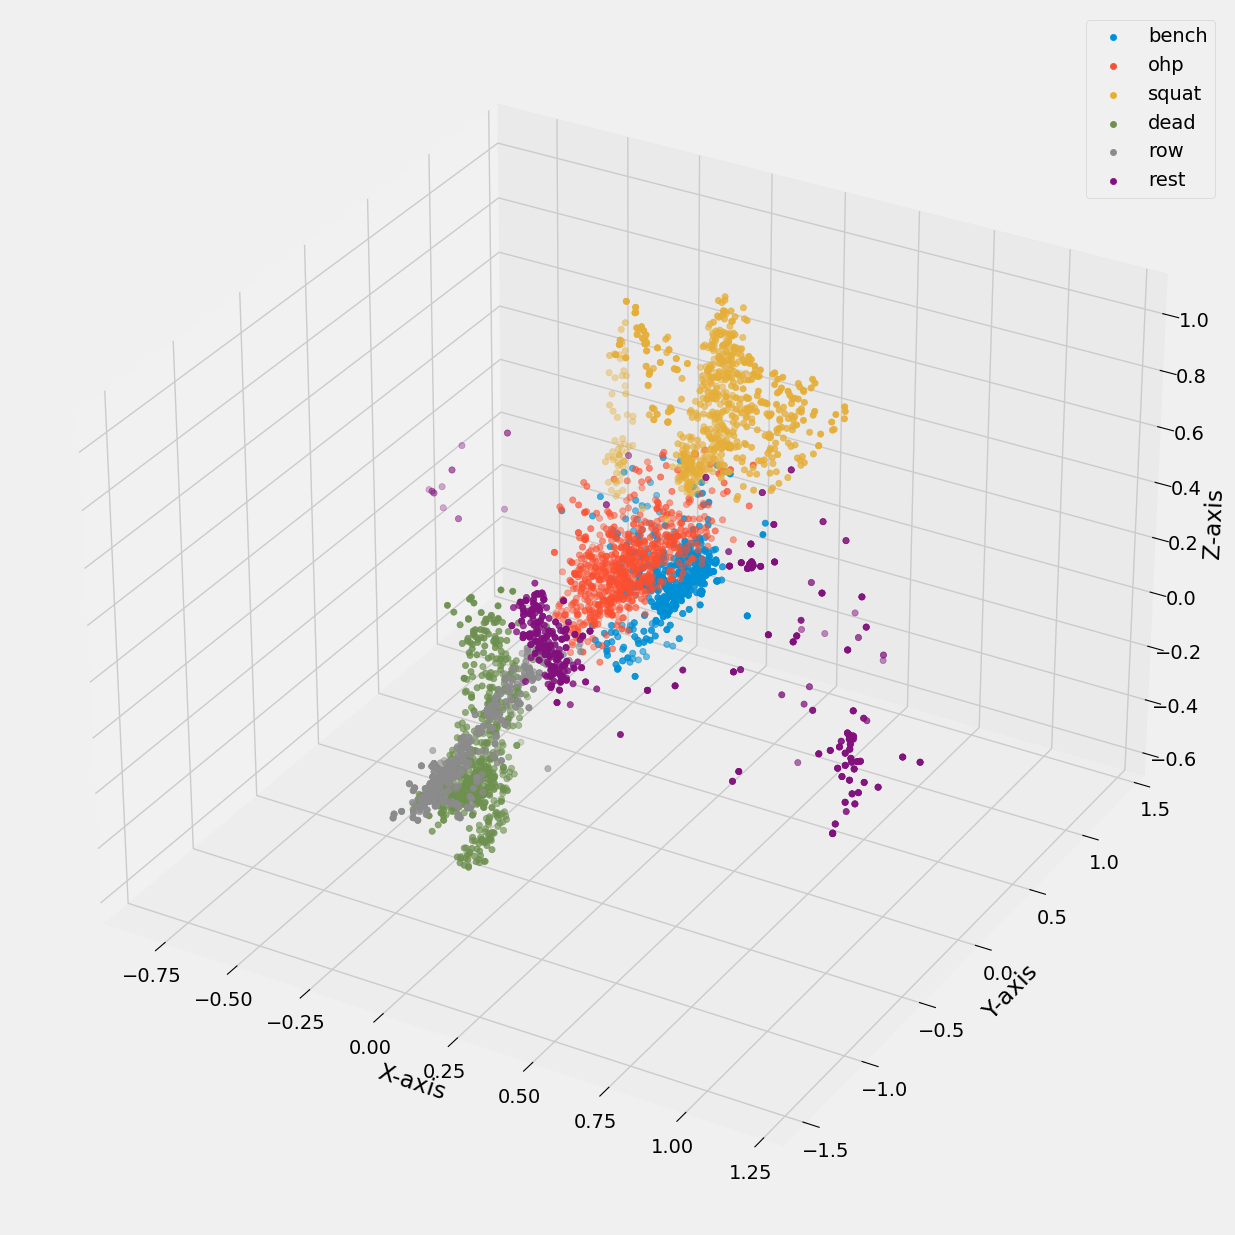

In [74]:
# Plotting accelerometer data to compare but we will plot using labels

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection = "3d")
for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label = l)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [75]:
df_cluster.to_pickle("../data/interim/03_data_features.pkl")